In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
filepath = "C:\\Users\\DELL\\Downloads\\20250320\\"
filename = filepath +'250320154345spectrum.dat'

In [7]:
T = 303.15
k_B = 1.38064852e-23

In [8]:
# 自定义列名（避免特殊符号）
column_names = [
    "freq_Hz",
    "S_xy_psd_V_per_rtHz",
    "ch1_V_per_rtHz",
    "ch2_V_per_rtHz",
    "S_xy_imaginary_part_V2_per_Hz",
    "S_xy_real_part_V2_per_Hz"
]


In [9]:
# 读取文件（假设分隔符为制表符或连续空格）
df = pd.read_csv(
    filename,
    sep=r'\s+',  # 正则匹配任意空白符
    skiprows=6,  # 跳过列说明行"cols: ..."
    names=column_names,
    engine='python',  # 确保正则分隔符生效
    dtype=np.float64  # 自动处理科学计数法
)

In [10]:
def read_data(filename):
    # 读取数据
    # 读取文件（假设分隔符为制表符或连续空格）
    df = pd.read_csv(
        filepath+filename,
        sep=r'\s+',  # 正则匹配任意空白符
        skiprows=6,  # 跳过列说明行"cols: ..."
        names=column_names,
        engine='python',  # 确保正则分隔符生效
        dtype=np.float64  # 自动处理科学计数法
        )
    return df

In [11]:
# 验证前3行数据
print(df.head(3))

    freq_Hz  S_xy_psd_V_per_rtHz  ch1_V_per_rtHz  ch2_V_per_rtHz  \
0  0.000000             0.008443        0.005809        0.013613   
1  0.381470             0.002993        0.002316        0.006212   
2  0.762939             0.001896        0.001693        0.005068   

   S_xy_imaginary_part_V2_per_Hz  S_xy_real_part_V2_per_Hz  
0                   0.000000e+00                  0.000071  
1                   8.167025e-07                  0.000009  
2                  -2.172627e-06                  0.000003  


In [12]:
x = df["freq_Hz"]
y = df["S_xy_psd_V_per_rtHz"]

In [13]:
V = np.log10(4*k_B*T*100*1000)/2 +3
print(V)

-4.388099652205394


In [14]:
x = np.array(x)
y = np.array(y)

x = np.log10(x)
y = np.log10(y)


C:\Users\DELL\AppData\Local\Temp\ipykernel_18692\1865808284.py:4: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


In [15]:
V

-4.388099652205394

In [16]:
interval = np.linspace(3, np.log10(3000), 100)

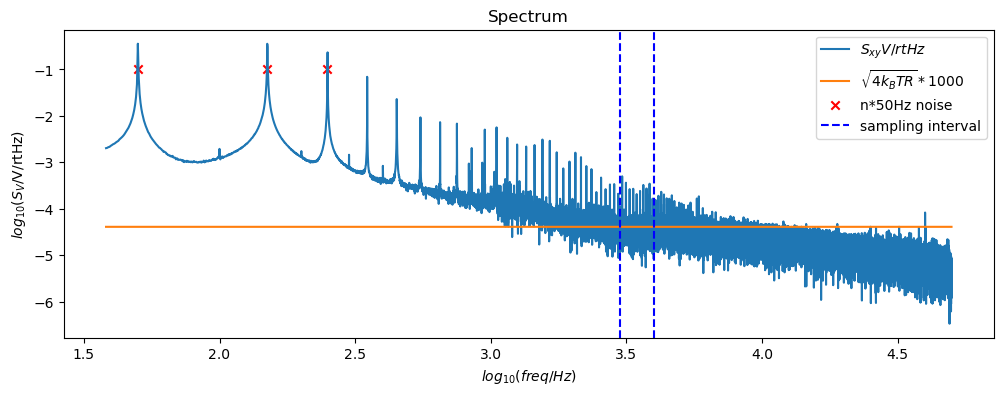

In [17]:
plt.figure(figsize=(12, 4))
plt.plot(x[100:],y[100:],label='$S_{xy} V /rtHz$')

z = np.ones(len(x[100:]))*V
plt.plot(x[100:],z,label='$\sqrt{4k_B TR}*1000$') 
plt.scatter([np.log10(50),np.log10(150),np.log10(250)],[-1,-1,-1],marker='x',color='red',label='n*50Hz noise');
plt.axvline(x = np.log10(3000), color = 'b', label = 'sampling interval',linestyle='--')
plt.axvline(x = np.log10(4000), color = 'b',linestyle='--')
plt.legend()
plt.xlabel('$log_{10}(freq/Hz)$')
plt.ylabel('$log_{10}(S_V$/V/rtHz)')
plt.title('Spectrum')
plt.show()

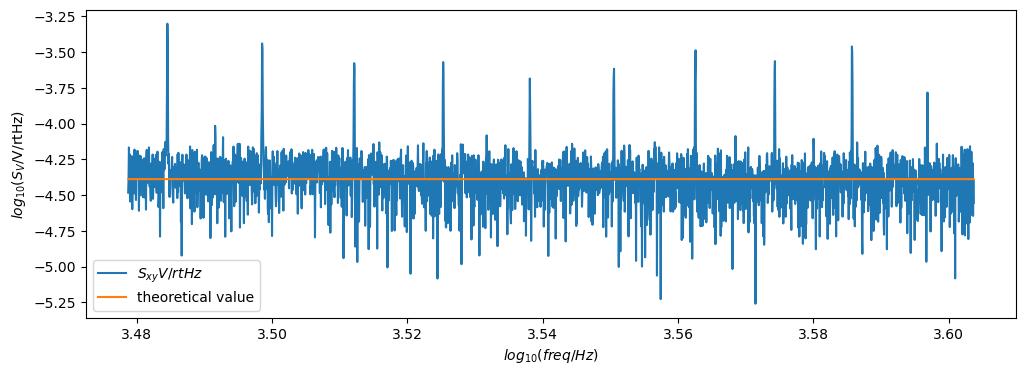

In [18]:
m = int(3000/0.38); n = int(4000/0.38)
plt.figure(figsize=(12, 4))
plt.plot(x[m:n],y[m:n],label='$S_{xy} V /rtHz$')

z = np.ones(len(x[m:n]))*V
plt.plot(x[m:n],z,label='theoretical value') 
#plt.scatter([np.log10(50),np.log10(4000)],[V-1,V-1],marker='x',color='red');
plt.legend()
plt.xlabel('$log_{10}(freq/Hz)$')
plt.ylabel('$log_{10}(S_V$/V/rtHz)')
plt.show()

In [19]:
np.mean(y[m:n])

-4.395152595838046

In [20]:
V

-4.388099652205394

In [21]:
10**x[n]

4015.3502999999982

In [22]:
def get_noise(df):
    y = df["S_xy_psd_V_per_rtHz"]
    y = np.array(y)
    m = int(3000/0.38); n = int(4000/0.38)
    return np.mean(y[m:n])

In [23]:
np.log10(get_noise(df))

-4.358043663124119

In [24]:
V

-4.388099652205394

In [25]:
filelist = ['250320154345spectrum.dat','250320154442spectrum.dat','250320154628spectrum.dat','250320154727spectrum.dat','250320155053spectrum.dat','250320155150spectrum.dat']

In [26]:
Vs = [] 
for x in filelist:
    df = read_data(x)
    v = np.log10(get_noise(df))
    Vs.append(v)
    print(x,'V=',v)

250320154345spectrum.dat V= -4.358043663124119
250320154442spectrum.dat V= -4.4289549152982515
250320154628spectrum.dat V= -4.561325697504917
250320154727spectrum.dat V= -4.760477222298032
250320155053spectrum.dat V= -4.912770940864088
250320155150spectrum.dat V= -5.371177799627964


In [27]:
R = [100*1000, 50*1000, 20*1000, 10*1000, 1*1000, 500.0]
np.log10(R)

array([5.     , 4.69897, 4.30103, 4.     , 3.     , 2.69897])

In [28]:
for x in R:
    print(np.log10(4*k_B*T*x)/2 +3)

-4.388099652205394
-4.538614650037384
-4.7375846543734035
-4.888099652205393
-5.388099652205394
-5.538614650037385


In [70]:
V1 = np.array(Vs)[1:]
R0 = np.log10(R)[:-1]

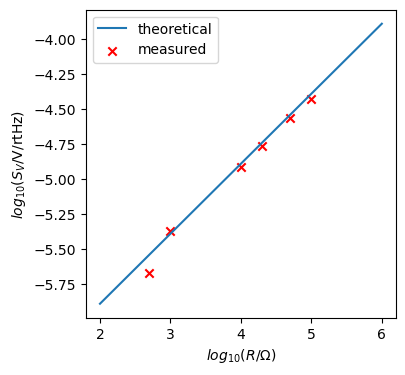

In [71]:


resistor = np.linspace(2, 6, 100)
Voltage = (np.log10(4*k_B*T)+resistor)/2  +3
plt.figure(figsize=(4, 4))
plt.plot(resistor,Voltage,label='theoretical')
plt.scatter(R0,V1,marker='x',color='r',label='measured')
plt.scatter([np.log10(500)],[-5.67],marker='x',color='r')
plt.legend()
plt.xlabel('$log_{10}(R/\Omega)$')
plt.ylabel('$log_{10}(S_V$/V/rtHz)')
plt.show()

In [86]:
import scipy.stats as stats
slope, intercept, r_value, p_value, std_err = stats.linregress(R0-4,V1)   
print('slope:',slope)
print('intercept:',intercept)
print('r_value:',r_value)

slope: 0.4740661942575368
intercept: -4.901754553970159
r_value: 0.9997860688188016


In [32]:
k0 = []
for x in range(len(R0)):
    ek = 2*V1[x]-6- (R0[x])-np.log10(4*T)
    k0.append(10**ek)
    print(2*V1[x]-6- (R0[x])-np.log10(4*T))

-22.941627394495452
-22.905338963244798
-22.905702004158993
-22.909259445627125
-22.826073163154877


In [33]:
np.log10(np.mean(k0))

-22.895866827525758

In [34]:
np.mean(k0)

1.2709637750055762e-23

In [35]:
np.std(k0)

1.168796566543974e-24

In [120]:
U0 = np.array([0.433,0.293,0.178,0.107,0.058,0.030])
U1 = np.array([0.434,0.276,0.173,0.105,0.055,0.029])
S = np.array([9.268,7.509,5.901,4.507,3.268,2.293]) 
I = np.log10((U0 + U1)*0.5) -5
current = np.linspace(-7, -5, 100)
Voltage = current + np.log10(2*1.602e-9) 

In [107]:
slope, intercept, r_value, p_value, std_err = stats.linregress(I,np.log10(S)*2-16)
print('slope:',slope)   
print('intercept:',intercept)
print('r_value:',r_value)

slope: 1.038693072577214
intercept: -8.487996512561175
r_value: 0.9998855957116678


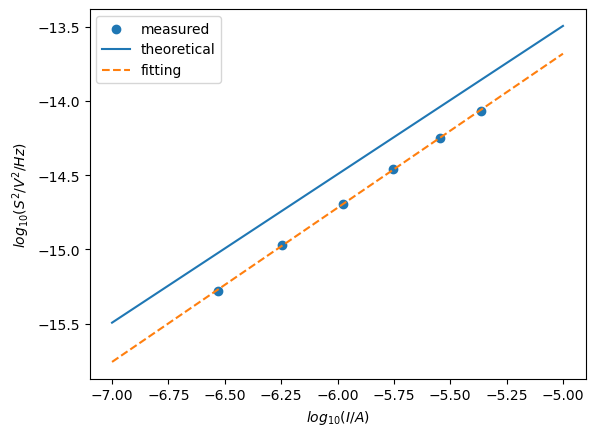

In [121]:
plt.scatter(I,np.log10(S)*2-16,label='measured')
plt.plot(current,Voltage,label='theoretical') 
plt.plot(current,intercept + slope*current,label='fitting',linestyle='--')
plt.legend()
plt.xlabel('$log_{10}(I/A)$')
plt.ylabel('$log_{10}(S^2/V^2/Hz)$')
plt.show()

In [101]:
I

array([-5.3630109 , -5.54591773, -5.75572288, -5.97469413, -6.24795155,
       -6.53017798])

In [102]:
S

array([9.268, 7.509, 5.901, 4.507, 3.268, 2.293])

In [115]:
electron = np.log10(S)*2-16 - I -10 #-np.log10(2)

In [116]:
electron

array([-18.70301705, -18.70291806, -18.70242589, -18.71753075,
       -18.72348435, -18.74901391])